# Land Use and Land Cover Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *  
from fastai.metrics import error_rate 
import zipfile
import urllib.request 
import os 

In [4]:
data_path = os.getcwd()
path = datapath4file(data_path+'/2750')

## Training: resnet50

In [5]:
tfms = get_transforms(flip_vert=True, max_warp = 0.)

In [6]:
data = ImageDataBunch.from_folder(path, train = ".", 
                                  valid_pct=0.2, 
                                  ds_tfms = tfms, 
                                  size=224, bs = 32).normalize(imagenet_stats)

### Viewing our data: 

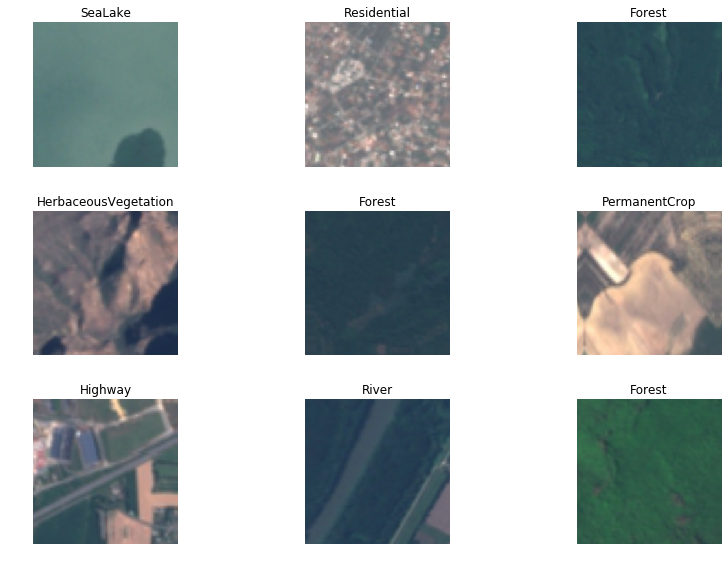

In [25]:
data.show_batch(rows=3, figsize=(12,8))

### Model Architecture and Training

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [30]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03


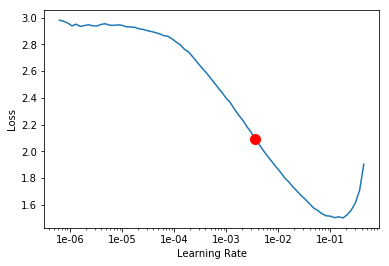

In [14]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [16]:
lr = 3.63E-03
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.332222,0.173543,0.057778,06:35
1,0.193767,0.105599,0.036296,06:29
2,0.145421,0.090552,0.030185,06:29
3,0.121932,0.072717,0.023519,06:29
4,0.095987,0.060132,0.019444,06:29
5,0.082530,0.058717,0.018889,06:29


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


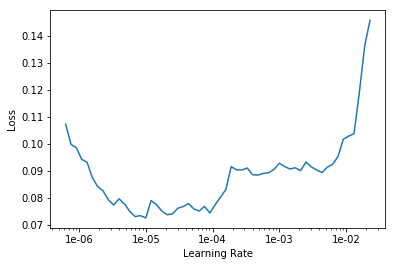

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-6, lr/10))

epoch,train_loss,valid_loss,error_rate,time
0,0.089976,0.058546,0.018889,08:35
1,0.076192,0.052770,0.018148,08:35
2,0.065030,0.049059,0.017037,08:35


In [9]:
#learn.save('resnet50_mod_02')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


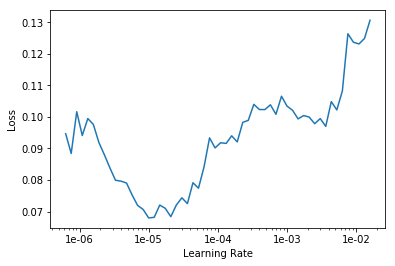

In [8]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
#learn.load('resnet50_mod_02')
learn.fit_one_cycle(1, slice(1e-5/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.085673,0.027134,0.010000,06:42


In [15]:
#learn.save('resnet50_mod_03')

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
#interp.plot_top_losses(9, figsize=(15,11))

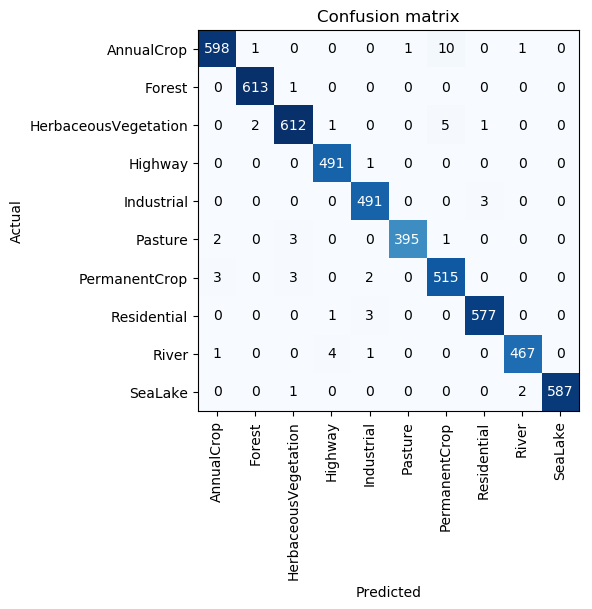

In [18]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

In [23]:
interp.most_confused(min_val=5)

[('AnnualCrop', 'PermanentCrop', 10),
 ('HerbaceousVegetation', 'PermanentCrop', 5)]

In [26]:
learn.export()

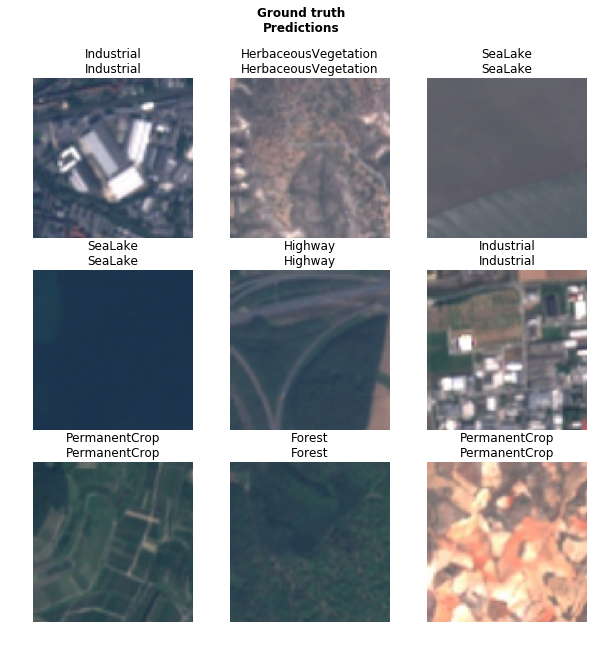

In [28]:
learn.show_results(rows=3, figsize=(10,10))

In [36]:
learn = load_learner(path)

In [1]:
#learn

In [41]:
learn.data.classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

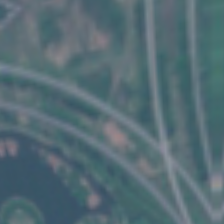

In [52]:
img = data.train_ds[5403][0];img

In [53]:
learn.predict(img)

(Category Highway,
 tensor(3),
 tensor([9.7798e-06, 7.2613e-07, 9.9023e-06, 9.9714e-01, 1.9925e-05, 2.9760e-06,
         4.0926e-04, 6.7638e-04, 1.7173e-03, 1.0724e-05]))